## Overview

In this article we will be making hands landmarks detection model with the profound library i.e. mediapipe as base library and for other computer vision preprocessing CV2 library. There are many use cases in the market for this problem statement whether it's for business related virtual reality or in the gaming section for the real-time experience.

### Industry use cases

1. Smart homes: This is one of the modern use cases of the computer vision and people are leverage to live the more comfortable life and that's why it's no longer the niche area infact it is spreading to common household as well.

2. Smart TVs: We have often saw this use case where with your hand moments one can change the volume, change the channels and what not.

3. Games: For real experience this technology is getting more into interactive gaming.

### Import the Libraries

Here we will import all the libraries that will be required in whole pipeline

In [2]:
!pip install mediapipe -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 66.6 MB/s eta 0:00:00


In [3]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

## Initializing the hands landmarks detection model using Mediapipe

Whenever we talk about the detection whether it is object, person, animal or as in our case hands detection then the very first step is to initialize the model with valid paramaters no matter with what detection technique we are following it can either be mediapipe or yolo but initializing the model is important, following the same principle we will be following all the given steps:

In [4]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

Code-breakdown:

1. Firstly initializing the class of hands by **`mp.solutions.hands`** with a variable.
2. Then using the same variable setting up the function for hands by **`mp.solutions.hands.Hands()`**.

By far we understood the structure of hands model initialization now let's deep dive into the arguments used in `hands` function.

* **`static_image_mode`**: This argument takes up the boolean value as it valid values i.e. it can be either `True or False`. the by default condition remains the False condition which basically remains for the video streaming when I say video streaming then that means it results for the lower latency of processing i.e. it keeps on focusing on particular hands and localises the same hands until it lose the track of that particular hand which can be benificial when we have to detect the hands in live stream or in videos but according to our requirement we have to detect the landmarks on image hence we will set the value to `True`.


* **`max_num_hands`**: This argument will indicate the maximum number of hands that the model will detect at one instance. By default the value is 2 which also make sense that atleast we will want a pair of hand to be detected though we can change that for sure.


* **`min_detection_confidence`**: This argument provides us the flexibility that how much regidity we want from our detection model and in that case it provides the threshold value of the level of confidence. The ideal range of minimum detection confidence is [0.0,1.0] and by default it remains 0.5 which means that if the confidence level drops below 50% then the hands will not be detected at all in the output image.

3. At last we will be using the **`mp.solutions.drawing_utils`** which will be responsible to draw all the hands landmarks points on the output image which were detected by our Hands function.

### Read an Image

Here we will be first using the `cv2.imread()` to read the image on which hands detection is to be performed and `matplotlib` library to show that particular input image.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


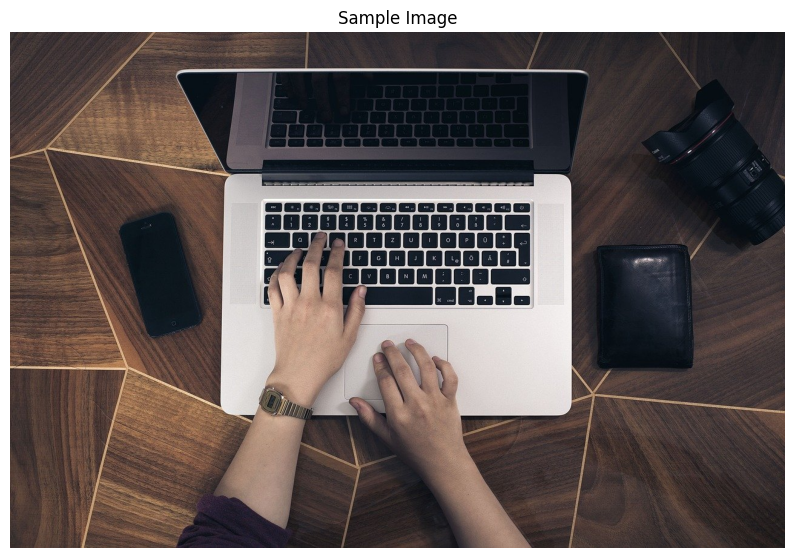

In [8]:
# Reading the sample image on which we will perform the detection
sample_img = cv2.imread('/content/drive/MyDrive/PGD-DL-B3n4/09/hands-landmarks-detection-mediapipe-main/media/sample.jpg')

# Here we are specifing the size of the figure i.e. 10 -height; 10- width.
plt.figure(figsize = [10, 10])

# Here we will display the sample image as the output.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

## Perform Hands Landmarks Detection

So as we have initialized our hand detection model now our next step will be to process the hand landmarks detection on the input image and draw all the 21 landmarks points on that image with the above initialised model for doing that we will be going through the following steps.

![hand_landmarks.png](attachment:hand_landmarks.png)

In [10]:
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(20):

            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.3720700740814209
y: 0.6716852784156799
z: 2.3654320102650672e-07

THUMB_CMC:
x: 0.4140221178531647
y: 0.6469953060150146
z: -0.0033395097125321627

THUMB_MCP:
x: 0.4352489709854126
y: 0.5999167561531067
z: -0.005115693435072899

THUMB_IP:
x: 0.4470454752445221
y: 0.5445414781570435
z: -0.0049952673725783825

THUMB_TIP:
x: 0.4525246322154999
y: 0.5016067624092102
z: -0.0043427469208836555

INDEX_FINGER_MCP:
x: 0.4126019775867462
y: 0.5401198863983154
z: -0.012503734789788723

INDEX_FINGER_PIP:
x: 0.4185769259929657
y: 0.4683429002761841
z: -0.014565947465598583

INDEX_FINGER_DIP:
x: 0.4224993586540222
y: 0.43077021837234497
z: -0.011983748525381088

INDEX_FINGER_TIP:
x: 0.42619508504867554
y: 0.40629133582115173
z: -0.009034432470798492

MIDDLE_FINGER_MCP:
x: 0.3846029043197632
y: 0.5343866944313049
z: -0.011021008715033531

MIDDLE_FINGER_PIP:
x: 0.3884788751602173
y: 0.4526100754737854
z: -0.01577182486653328

MIDDLE_FINGER_DIP:
x: 0.3

Code-breakdown:

1. In the very first step we are usig the `process` function from the mediapipe library to store the hand landmarks detection results in the variable along with that we have converted the image from the BGR format to the RGB format.

2. While coming to the next step we will first check for some valdation that whether the points are detected or not i.e. the variable should have some results in it.

3. If yes, then we will loop through all the points that were detected in the image of which has the hands landmarks points.

4. Now in the other loop we can see that there are only 2 iterations because we only want to show 2 landmarks of the hands.

5. At the last we will printout all the landmarks point that are detected and filtered out according to the requirements.

From the above processing we have encountered that all the landmarks which were detected are normalised to the common scales but now for the user end those scaled points are not relevant for that reason we will bring back those landmarkd to the original state.

In [ ]:
image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(2):

            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}\n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 476.24969482421875
y: 572.947542488575
z: 0.0003027752973139286

THUMB_CMC:
x: 529.9483108520508
y: 551.8869960308075
z: -4.274572432041168

HAND NUMBER: 2
-----------------------
WRIST:
x: 705.919189453125
y: 695.54571133852
z: 0.00027666515961755067

THUMB_CMC:
x: 656.2027740478516
y: 692.9478495717049
z: -9.670578837394714



Code-breakdown:

There is only one ectra step that we need to perform here i.e. we will attain the original width and height of the image from the sample image that we defined and then all the steps will be same as we have done previously only difference in the output will be that now the landmarks points are not scaled specifically.

### Draw the landmarks on the image

As we have got the hands landmarks from the above preprocessing now it's time to execute our final step which is to draw the points on the image so that we can visually see that how our hands landmarks detection model is performing.

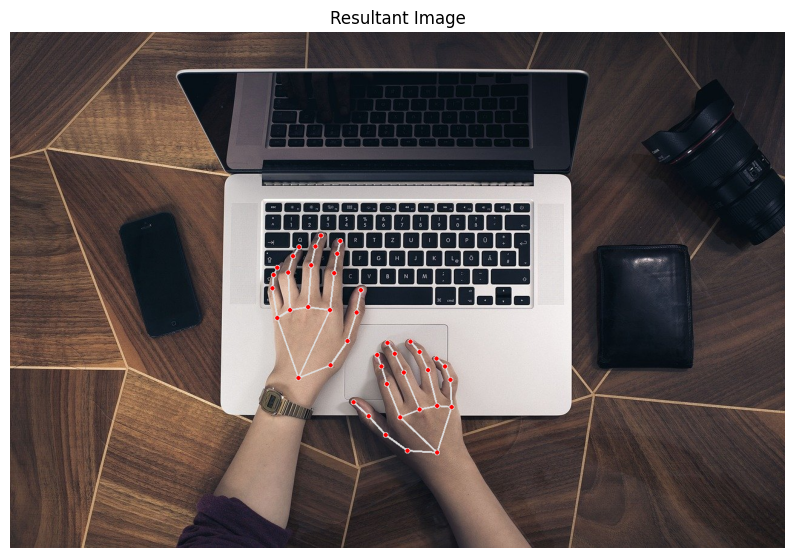

In [11]:
img_copy = sample_img.copy()

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)

    fig = plt.figure(figsize = [10, 10])

    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

Code-breakdown:

1. First we will create the copy of the original image, this step is done for safety purpose as we don't want to loose the originality of the image.

2. Then we will take care of the validation thing which we did previously as well.

3. Then we will loop through the each landmarks of hands.

4. Finally with the help of **`mp_drawing.draw_landmarks`** function we will draw the landmarks on the image.

5. It's time to plot the image using matplotlib so first we will give the figure size (here, width-10 and height-10), then at th last plot the image using **`imshow`** function after converting the BGR format into RGB format because for the end user RGB format makes more sense.

## Conclusion

In complete pipeline we first have `initialise the model` then we `read the image` to have a look on our input image later for the preprocessing we have scaled down the landmarks point yet those points are not relevant for the user end so for that we have revert it to original state at the last we will `draw the landmarks points` on the image.

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [ ]:
# For webcam input:
cap = cv2.VideoCapture('/home/tjamil/MyWork/U05_vid_project/Data/videos_combined/1/1.mp4')
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()